In [3]:
# Import Libraries

# For Data analysis
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_excel(r'C:\Users\User\Downloads\heart.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.columns = ['age', 'sex', 'chesta_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_reate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chesta_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_reate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# data verification - Data type, number of features and rows, missing data etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       303 non-null    int64  
 1   sex                       303 non-null    int64  
 2   chesta_pain_type          303 non-null    int64  
 3   resting_blood_pressure    303 non-null    int64  
 4   cholesterol               303 non-null    int64  
 5   fasting_blood_sugar       303 non-null    int64  
 6   rest_ecg                  303 non-null    int64  
 7   max_heart_reate_achieved  303 non-null    int64  
 8   exercise_induced_angina   303 non-null    int64  
 9   st_depression             303 non-null    float64
 10  st_slope                  303 non-null    int64  
 11  num_major_vessels         303 non-null    int64  
 12  thalassemia               303 non-null    int64  
 13  target                    303 non-null    int64  
dtypes: float64

In [23]:
# Statistical Analysis of the data
df.describe()

,age,sex,chesta_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_reate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                         0
sex                         0
chesta_pain_type            0
resting_blood_pressure      0
cholesterol                 0
fasting_blood_sugar         0
rest_ecg                    0
max_heart_reate_achieved    0
exercise_induced_angina     0
st_depression               0
st_slope                    0
num_major_vessels           0
thalassemia                 0
target                      0
dtype: int64


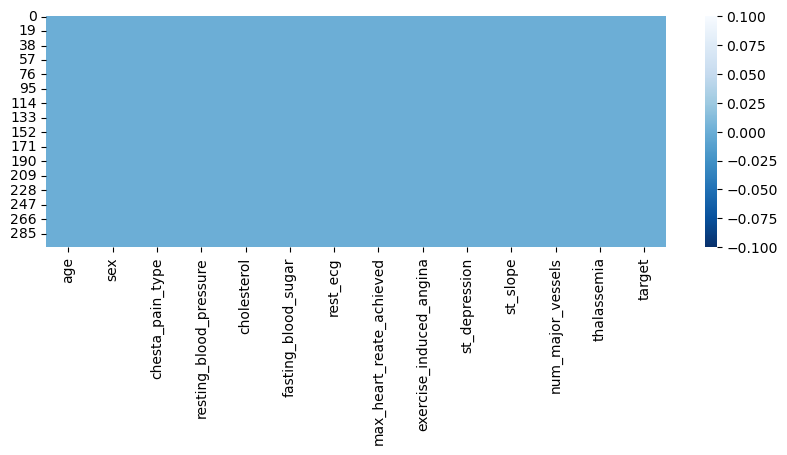

In [29]:
# check for missing Values
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues_r');

### Exploratory Data Analysis

#### Univariate Analysis

In [33]:
df.columns

Index(['age', 'sex', 'chesta_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_reate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

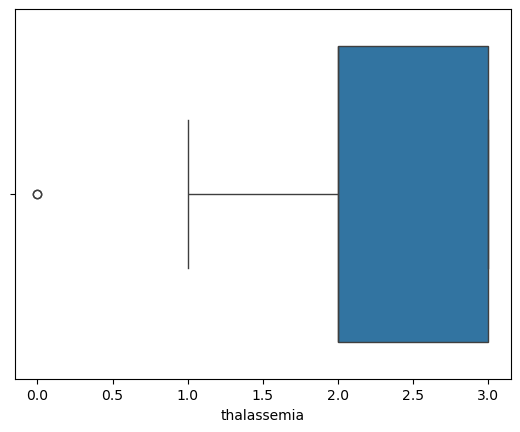

In [37]:
# check for outliers
sns.boxplot(x=df['thalassemia']);

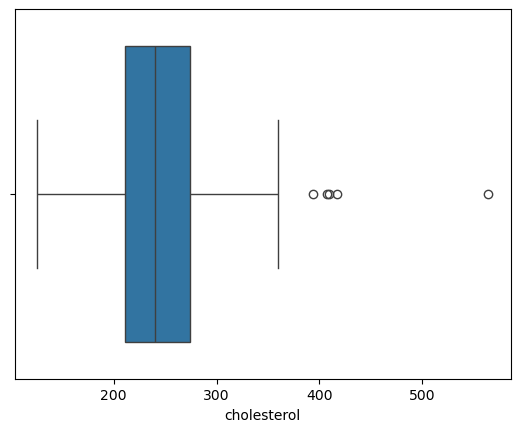

In [39]:
sns.boxplot(x=df['cholesterol']);

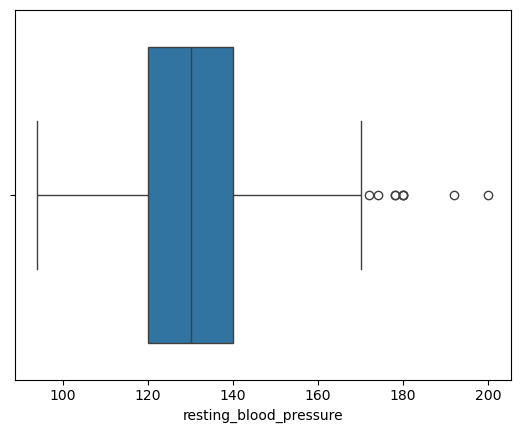

In [41]:
sns.boxplot(x=df['resting_blood_pressure']);

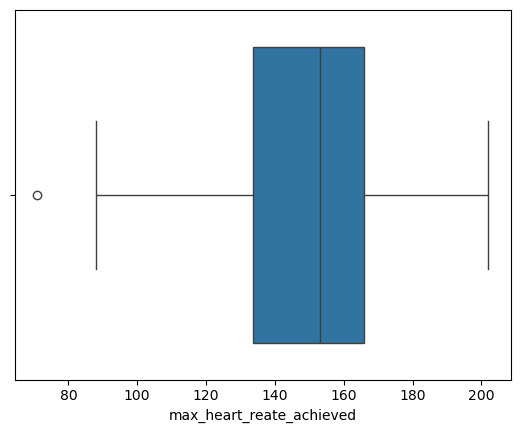

In [43]:
sns.boxplot(x=df['max_heart_reate_achieved']);

Text(0.5, 1.0, 'Total Number of Patients')

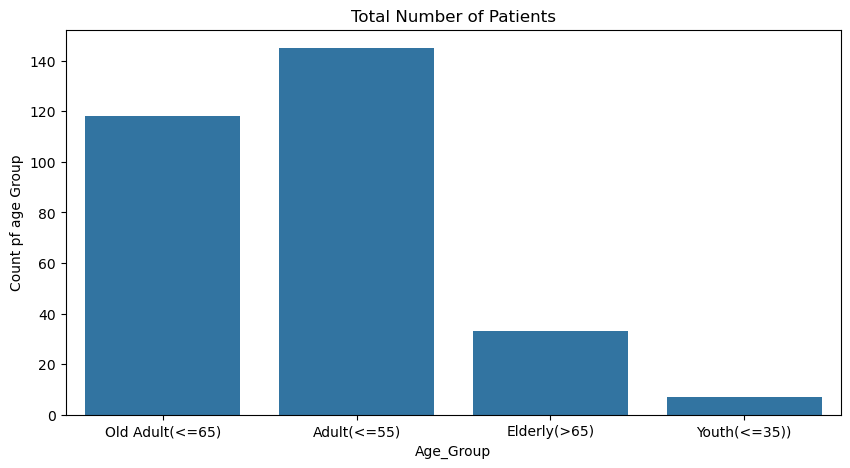

In [34]:
# Data Visualization
#Age Bracket

def age_bracket(age):
    if age <= 35:
        return "Youth(<=35))"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

df["age_bracket"] = df['age'].apply(age_bracket)

# investigating the age group of patientd
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age_Group')
plt.ylabel('Count pf age Group')
plt.title('Total Number of Patients')

In [49]:
df.head()

,age,sex,chesta_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_reate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55)
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55)
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65)
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65)


Text(0.5, 1.0, 'Total Number of Patients')

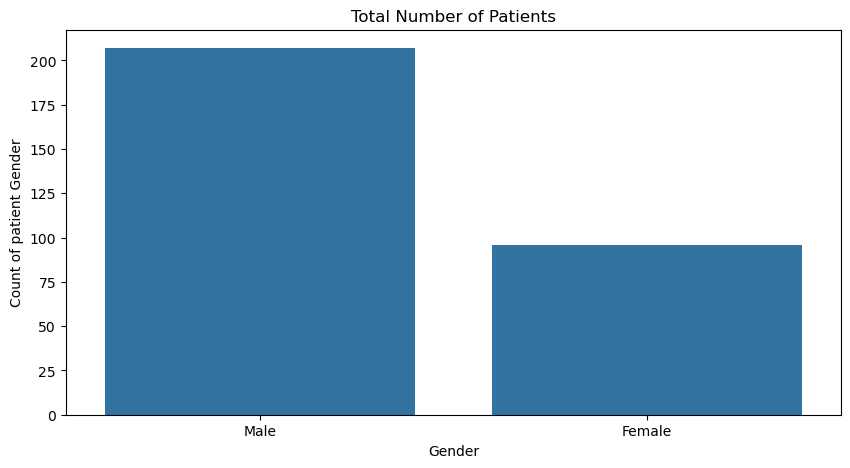

In [42]:
# Data Visualization
#Sex

def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"

df['gender'] = df["sex"].apply(gender)

# Investigating the gender of patients

plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

In [53]:
df.head()

,age,sex,chesta_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_reate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female


Text(0.5, 1.0, 'Total Number of Patients')

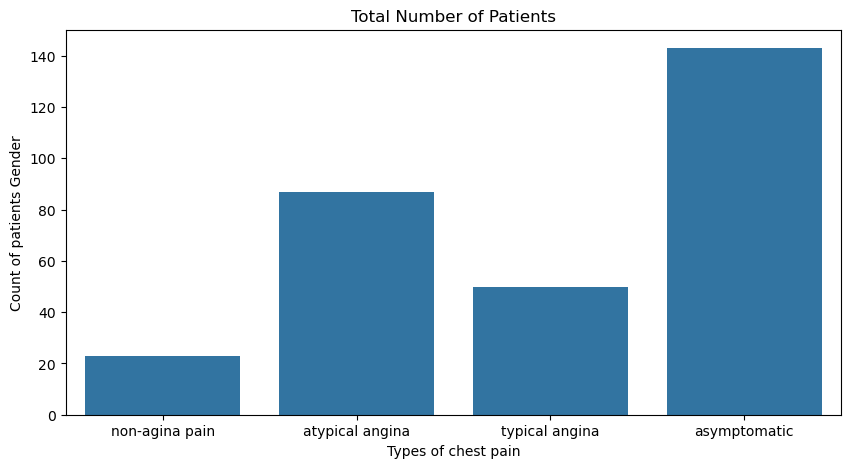

In [53]:
# Data Visualization
# Chest pain type (1: typical angina; 2: atypical angina; 3: non-agina pain; 4: asymptomatic)
def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-agina pain"
    else:
        return "asymptomatic"

df["cp_cat"] = df['chesta_pain_type'].apply(chest_pain)

#Investigating the chest pain type of Patients
plt.figure(figsize=(10, 5))
sns.countplot(x="cp_cat", data=df)
plt.xlabel("Types of chest pain")
plt.ylabel("Count of patients Gender")
plt.title("Total Number of Patients")

In [23]:
df.columns

Index(['age', 'sex', 'chesta_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_reate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'cp_cap',
       'cp_cat'],
      dtype='object')

label
Yes    165
No     138
Name: count, dtype: int64


Text(0.5, 1.0, 'Total number of Patients')

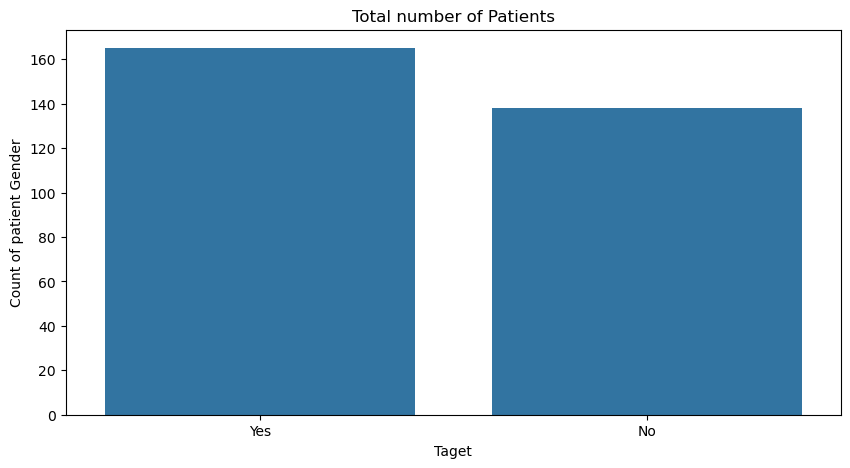

In [55]:
# Data Visualization 
# target - Have disease or not (1=yes, 0=no)
def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"

df['label'] = df['target'].apply(label)

# Total patient in each category
print(df['label'].value_counts())

# Investigating the gender fof patients
plt.figure(figsize=(10,5))
sns.countplot(x="label", data=df)
plt.xlabel("Taget")
plt.ylabel("Count of patient Gender")
plt.title("Total number of Patients")

### Bivariate Analysis

Text(0.5, 1.0, 'Total number of Patients')

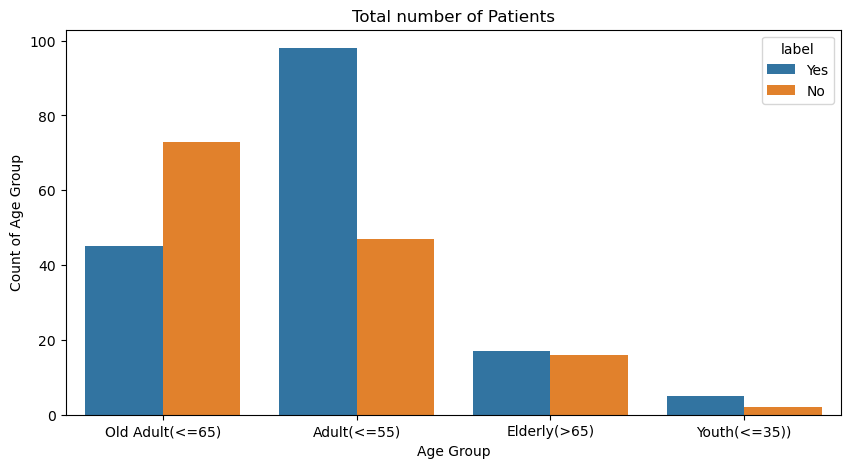

In [36]:
# Investigating the age group of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x="age_bracket", data=df, hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total number of Patients")

In [38]:
df.columns

Index(['age', 'sex', 'chesta_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_reate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'cp_cap',
       'cp_cat', 'label', 'age_bracket'],
      dtype='object')

Text(0.5, 1.0, 'Total number of Patients')

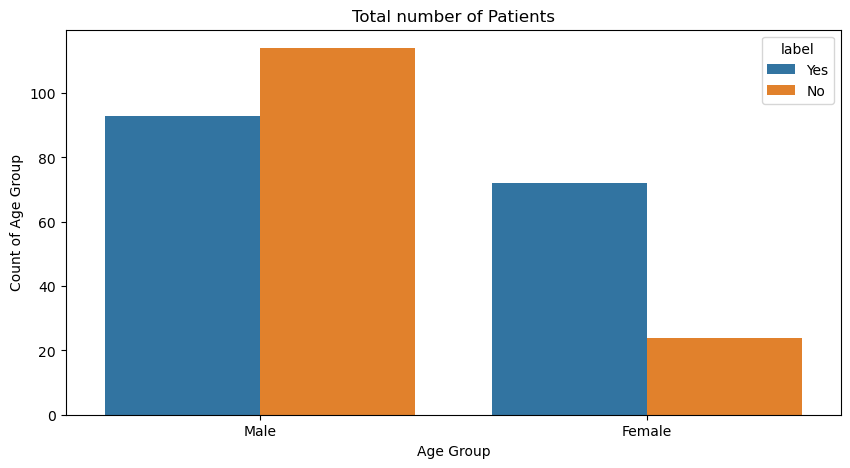

In [44]:
# Investigating the age group of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x="gender", data=df, hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total number of Patients")

Text(0.5, 1.0, 'Total number of Patients')

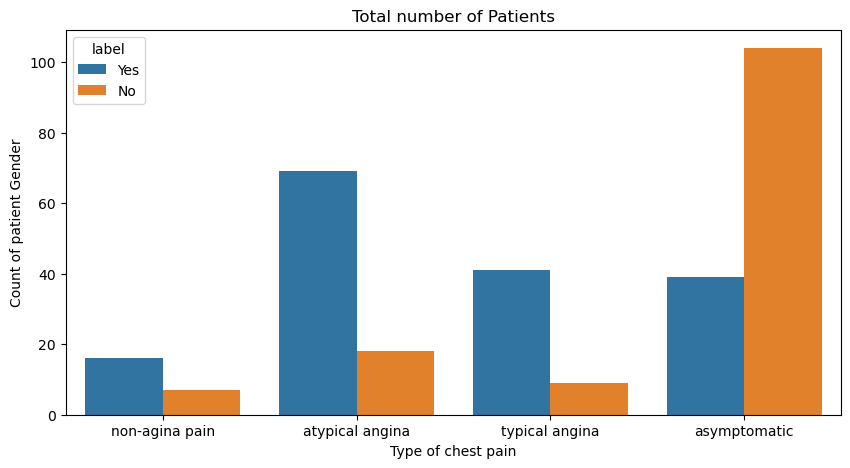

In [46]:
# Investigating the age group of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x="cp_cat", data=df, hue="label")
plt.xlabel("Type of chest pain")
plt.ylabel("Count of patient Gender")
plt.title("Total number of Patients")

### Multivariate analysis

In [59]:
# Correlation between 
plt.figure(figsize = (10,10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size: 10'})

ValueError: could not convert string to float: 'non-agina pain'

<Figure size 1000x1000 with 0 Axes>

#### Feature Engineering and Data Preprocessing

In [71]:
df.head()

,age,sex,chesta_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_reate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,cp_cap,cp_cat,label,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,non-agina pain,non-agina pain,Yes,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,atypical angina,atypical angina,Yes,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,typical angina,typical angina,Yes,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,typical angina,typical angina,Yes,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,asymptomatic,asymptomatic,Yes,Old Adult(<=65),Female


In [12]:
#create a copy of the data (excluding target/label and other columns
df3 = df[['age', 'sex', 'chesta_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_reate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']]
label = df[['target']]

In [14]:
df3.head()

,age,sex,chesta_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_reate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [96]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [16]:
df3.dtypes

age                           int64
sex                           int64
chesta_pain_type              int64
resting_blood_pressure        int64
cholesterol                   int64
fasting_blood_sugar           int64
rest_ecg                      int64
max_heart_reate_achieved      int64
exercise_induced_angina       int64
st_depression               float64
st_slope                      int64
num_major_vessels             int64
thalassemia                   int64
dtype: object

In [18]:
# Dealing with Outliers - 'resting_blood_pressure' 'cholesterol', 'thalassemia'

#Normalize the data
scaler = MinMaxScaler()

df3["Scaled_RPG"] = scaler.fit_transform(df3['resting_blood_pressure'].values.reshape(-1, 1))
df3["Scaled_chol"] = scaler.fit_transform(df3['cholesterol'].values.reshape(-1, 1))
df3["Scaled_thal"] = scaler.fit_transform(df3['thalassemia'].values.reshape(-1, 1))
df3["Scaled_max_heart_rate"] = scaler.fit_transform(df3['max_heart_reate_achieved'].values.reshape(-1, 1))

df3.drop(['resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heart_reate_achieved'], axis=1, inplace=True)

df3.head()

,age,sex,chesta_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RPG,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### Machine Learning

In [20]:
# Split the dataset into training and testing sets - x = Question y = Answers
x_train, x_test, y_train, y_test = train_test_split(df3, label, test_size=0.2, random_state=42)

In [22]:
x_train.head(3)

,age,sex,chesta_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RPG,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [24]:
y_train.head(3)

,target
132,1
202,0
196,0


In [26]:
# Model Building 
# logistics Regression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy", accuracy_score(y_test, ly_pred))
print("Precision", precision_score(y_test, ly_pred))
print("Recall", recall_score(y_test, ly_pred))
print("F1-score", f1_score(y_test, ly_pred))
print("AUC-ROC", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy 0.8360655737704918
Precision 0.8666666666666667
Recall 0.8125
F1-score 0.8387096774193549
AUC-ROC 0.8372844827586207


In [30]:
ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [32]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


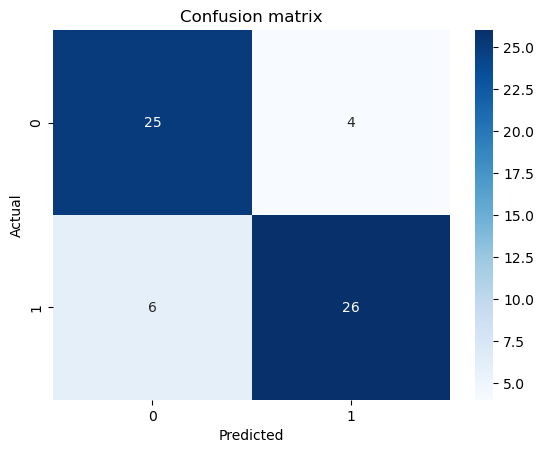

In [51]:
# create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [46]:
# Model Buidling
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random Forest
Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1-score: 0.8787878787878788
AUC-ROC: 0.8669181034482758


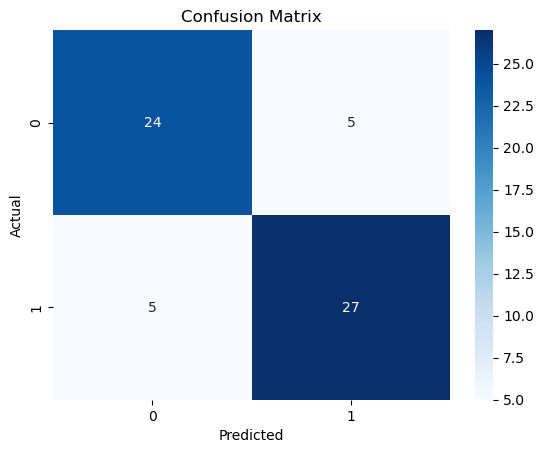

In [44]:
# Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [59]:
# deploying Machine Learning Algorithm to the dataset

classifiers = [[XGBClassifier(), "XGB Classifier"],
               [RandomForestClassifier(), "Rendom Forest"],
               [KNeighborsClassifier(), "k-Nearest Neighbours"],
               [SGDClassifier(), "SGD Classifier"],
               [SVC(), "SVC"],
               [GaussianNB(), "Naive Bayes"],
               [DecisionTreeClassifier(random_state=42), "Decision tree"],
               [LogisticRegression(), "Logistic Regression"]
              ]

In [63]:
classifiers


[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Rendom Forest'],
 [KNeighborsClassifier(), 'k-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionT

In [75]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]

    pred = model.predict(x_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])

    if model_name != classifier[-1][1]:
        print('')

In [77]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Rendom Forest': ['85.25%'],
 'k-Nearest Neighbours': ['75.41%'],
 'SGD Classifier': ['57.38%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision tree': ['85.25%'],
 'Logistic Regression': ['83.61%']}

In [79]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Rendom Forest,k-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.97%,85.25%,75.41%,57.38%,65.57%,86.89%,85.25%,83.61%


In [81]:
print("Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Rendom Forest,k-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,84.85%,79.31%,80.0%,65.71%,90.0%,92.59%,86.67%


In [83]:
print("Recall Score")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGB Classifier,Rendom Forest,k-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,78.12%,87.5%,71.88%,25.0%,71.88%,84.38%,78.12%,81.25%


In [85]:
print("Roc Score")
s4 = pd.DataFrame(roc_list)
s4.head()

Roc Score


,XGB Classifier,Rendom Forest,k-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,82.17%,85.13%,75.59%,59.05%,65.25%,87.02%,85.61%,83.73%
